In [142]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from datetime import datetime
%matplotlib inline

In [143]:
# Loading  data
df = pd.read_csv('UCI_Credit_Card_balanced.csv')

In [144]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

In [145]:
scaler = StandardScaler()

In [146]:
scaler.fit(df.drop('Y',axis=1))

StandardScaler()

In [147]:
scaled_features = scaler.fit_transform(df.drop('Y',axis=1))

In [148]:
X = pd.DataFrame(scaled_features,columns=df.columns[:-1]).values
y = df['Y'].values

In [149]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=69)

In [150]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

In [151]:
# create model
model = Sequential()
    
# hidden layer
model.add(Dense(X_train.shape[1]/2, input_dim=X_train.shape[1], kernel_initializer='normal', activation='relu'))
model.add(BatchNormalization())

# hidden layer
model.add(Dense(X_train.shape[1]/3, input_dim=X_train.shape[1], kernel_initializer='normal', activation='relu'))
model.add(BatchNormalization())

# hidden layer
model.add(Dense(X_train.shape[1]/4, kernel_initializer='normal', activation='relu'))
model.add(BatchNormalization())

# hidden layer
model.add(Dense(X_train.shape[1]/6, kernel_initializer='normal', activation='relu'))
model.add(BatchNormalization())

# hidden layer
model.add(Dense(X_train.shape[1]/8, kernel_initializer='normal', activation='relu'))
model.add(BatchNormalization())

# hidden layer
model.add(Dense(X_train.shape[1]/12, kernel_initializer='normal', activation='relu'))
model.add(BatchNormalization())


# output layer
model.add(Dense(1, activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [152]:
es = EarlyStopping(monitor='accuracy', patience=20, restore_best_weights=True)

In [153]:
from sklearn.metrics import confusion_matrix, cohen_kappa_score, accuracy_score, auc, roc_curve, precision_score, recall_score

In [154]:
model.fit(X_train, 
            y_train, 
            epochs=200,
            batch_size=500,
            validation_data=(X_test, y_test),
            verbose=0)

In [155]:
losses = pd.DataFrame(model.history.history)

<Figure size 504x360 with 0 Axes>

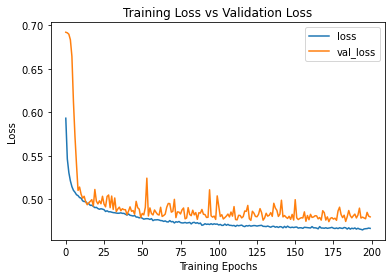

In [156]:
plt.figure(figsize=(7, 5))
losses[['loss','val_loss']].plot()
plt.xlabel('Training Epochs')
plt.ylabel('Loss')
plt.title('Training Loss vs Validation Loss')
plt.legend(loc='best')
plt.savefig(r'C:\Users\alanw\OneDrive\Varsity\Research\Paper Itself\LaTeX\images\ann_validation_loss.png')
plt.show()

<Figure size 504x360 with 0 Axes>

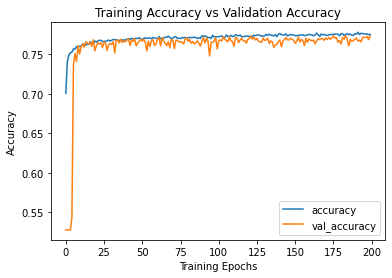

In [157]:
plt.figure(figsize=(7, 5))
losses[['accuracy','val_accuracy']].plot()
plt.xlabel('Training Epochs')
plt.ylabel('Accuracy')
plt.title('Training Accuracy vs Validation Accuracy')
plt.legend(loc='best')
plt.savefig(r'C:\Users\alanw\OneDrive\Varsity\Research\Paper Itself\LaTeX\images\ann_validation_accuracy.png')
plt.show()

In [158]:
y_pred = model.predict_classes(X_test)

In [159]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy*100))

Accuracy: 77.36%


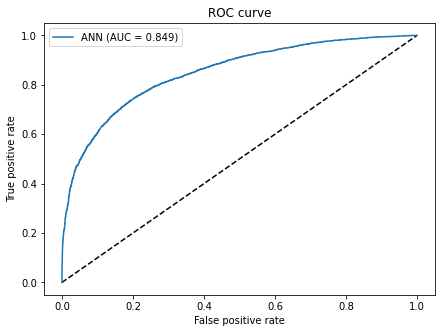

In [160]:
plt.figure(figsize=(7, 5))

predictions = model.predict(X_test).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, predictions)

auc_keras = auc(fpr_keras, tpr_keras)

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='ANN (AUC = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.savefig(r'C:\Users\alanw\OneDrive\Varsity\Research\Paper Itself\LaTeX\images\ann_roc.png')
plt.show()

In [161]:
kappa = cohen_kappa_score(y_test, y_pred)
print("Cohen's Kappa: %.2f%%" % (kappa*100))

Cohen's Kappa: 54.35%
